In [714]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFECV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from matplotlib import pyplot

# MATCHUP DATA REGULAR SEASON 2011-12 (Seperate Team Approach)

In [293]:
data_2011_12 = pd.read_csv(r"C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2011_12_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv")
data_2011_12.drop(["Unnamed: 0","E+/-.1","E+/-"],axis = 1, inplace  = True)
data_2011_12 = data_2011_12.loc[~data_2011_12.index.duplicated(keep='first')]
((data_2011_12)).shape

(1230, 155)

# MATCHUP DATA REGULAR SEASON 2012-13 (Seperate Team Approach)

In [295]:
data_2012_13 = pd.read_csv(r"C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2012_13_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv")
data_2012_13.drop(["Unnamed: 0"],axis = 1, inplace  = True)
data_2012_13 = data_2012_13.loc[~data_2012_13.index.duplicated(keep='first')]
(data_2012_13).shape

(720, 155)

# MATCHUP DATA REGULAR SEASON 2013-14 (Seperate Team Approach)

In [298]:
data_2013_14 = pd.read_csv(r"C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2013_14_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv")
data_2013_14.drop(["Unnamed: 0","E+/-.1","E+/-"],axis = 1, inplace  = True)
data_2013_14 = data_2013_14.loc[~data_2013_14.index.duplicated(keep='first')]
(data_2013_14).shape

(1231, 155)

# MATCHUP DATA REGULAR SEASON 2014-15 (Seperate Team Approach)

In [300]:
data_2014_15 = pd.read_csv(r"C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2014_15_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv")
data_2014_15.drop(["Unnamed: 0","E+/-.1","E+/-"],axis = 1, inplace  = True)
data_2014_15 = data_2014_15.loc[~data_2014_15.index.duplicated(keep='first')]
data_2014_15.shape

(1230, 155)

# MATCHUP DATA REGULAR SEASON 2015-16 (Seperate Team Approach)

In [301]:
data_2015_16 = pd.read_csv(r"C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2015_16_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv")
data_2015_16.drop(["Unnamed: 0","E+/-.1","E+/-"],axis = 1, inplace  = True)
data_2015_16 = data_2015_16.loc[~data_2016_17.index.duplicated(keep='first')]
data_2015_16.shape

(1230, 155)

# MATCHUP DATA REGULAR SEASON 2016-17 (Seperate Team Approach)

In [388]:
data_2016_17 = pd.read_csv(r"C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2016_17_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv")
data_2016_17.drop(["Unnamed: 0"],axis = 1, inplace  = True)
data_2016_17 = data_2016_17.loc[~data_2016_17.index.duplicated(keep='first')]
data_2016_17.

,Visitor,G,Home,G.1,Total_goal,Rk,AvAge,GP,W,L,...,FF rel.1,oiSH%.1,oiSV%.1,PDO.1,oZS%.1,dZS%.1,TK.1,GV.1,SAtt.1,Thru%.1
0,St. Louis Blues,5,Chicago Blackhawks,2,7,0.310345,0.542857,0.0,0.727273,0.270270,...,0.648012,0.418451,0.761743,0.701217,0.743034,0.256966,0.578739,0.608151,0.631876,0.701873
1,Calgary Flames,4,Edmonton Oilers,7,11,0.482759,0.628571,0.0,0.696970,0.378378,...,0.688513,0.357430,0.580598,0.546077,0.609423,0.390577,0.535869,0.762954,0.518444,0.567291
2,Toronto Maple Leafs,4,Ottawa Senators,5,9,0.413793,0.028571,0.0,0.545455,0.216216,...,0.376196,0.038210,0.212532,0.065924,0.572698,0.427302,0.259309,0.414661,0.262481,0.760300
3,Los Angeles Kings,1,San Jose Sharks,2,3,0.724138,0.857143,0.0,0.515152,0.432432,...,0.621168,0.337614,0.637859,0.561310,0.771070,0.229261,0.609841,1.000000,0.628236,0.435148
4,Montreal Canadiens,4,Buffalo Sabres,1,5,0.206897,0.771429,0.0,0.757576,0.189189,...,0.932914,0.131366,0.627479,0.386189,0.452114,0.547886,0.084526,0.157371,0.091568,0.897907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Carolina Hurricanes,4,Philadelphia Flyers,3,7,0.689655,0.200000,0.0,0.424242,0.324324,...,0.911241,0.230883,0.213780,0.223658,0.633778,0.366222,0.129183,0.389682,0.503136,0.731327
1226,Colorado Avalanche,2,St. Louis Blues,3,5,1.000000,0.428571,0.0,0.000000,1.000000,...,1.000000,0.596099,0.276371,0.562204,0.303011,0.696989,0.311979,0.000000,0.282034,0.807407
1227,Buffalo Sabres,2,Tampa Bay Lightning,4,6,0.862069,0.085714,0.0,0.333333,0.486486,...,0.725417,0.204881,0.393230,0.307816,0.289781,0.710219,0.212355,0.344555,0.308903,0.409497
1228,Columbus Blue Jackets,3,Toronto Maple Leafs,2,5,0.103448,0.028571,0.0,0.848485,0.135135,...,0.859397,0.451573,0.343012,0.484157,0.232401,0.767599,1.000000,0.799181,1.000000,0.488185


# MATCHUP DATA REGULAR SEASON 2017-18 (Seperate Team Approach)

In [395]:
data_2017_18 = pd.read_csv(r"C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2017_18_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv")
# data_2017_18.columns = data_2017_18.loc[0].to_list()
# data_2017_18.drop([0],axis = 0,inplace = True)
data_2017_18.drop(["Unnamed: 0","E+/-.1","E+/-"],axis = 1, inplace  = True)
data_2017_18 = data_2017_18.loc[~data_2017_18.index.duplicated(keep='first')]
data_2017_18
for i in range(0,(data_2017_18.shape[0])) :
    if data_2017_18.iloc[i, ].isnull().sum() > 0 :
        count = count + 1
        print(f'Number of null values in row {i} : ' + str(data_2017_18.iloc[i, ].isnull().sum()))
count

Number of null values in row 14 : 44
Number of null values in row 20 : 44
Number of null values in row 36 : 44
Number of null values in row 55 : 44
Number of null values in row 73 : 44
Number of null values in row 79 : 44
Number of null values in row 82 : 44
Number of null values in row 96 : 44
Number of null values in row 118 : 44
Number of null values in row 125 : 44
Number of null values in row 145 : 44
Number of null values in row 164 : 44
Number of null values in row 170 : 44
Number of null values in row 194 : 44
Number of null values in row 209 : 44
Number of null values in row 232 : 44
Number of null values in row 236 : 44
Number of null values in row 260 : 44
Number of null values in row 285 : 44
Number of null values in row 300 : 44
Number of null values in row 331 : 44
Number of null values in row 346 : 44
Number of null values in row 354 : 44
Number of null values in row 366 : 44
Number of null values in row 376 : 44
Number of null values in row 404 : 44
Number of null value

249

# MATCHUP DATA REGULAR SEASON 2018-19 (Seperate Team Approach)

In [351]:
data_2018_19 = pd.read_csv(r'C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2018_19_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv')
data_2018_19.drop(['Unnamed: 0',"E+/-.1","E+/-"],axis = 1,inplace = True)
#data_2018_19.columns = data_2018_19.loc[0].to_list()
#data_2018_19.drop([0],axis = 0,inplace = True)
#data_2018_19.drop(['Date','Visitor','Home',"Att."],axis = 1,inplace = True)
#data_2018_19.reset_index(inplace=True, drop=True)
#data_2018_19 = data_2018_19.loc[~data_2018_19.index.duplicated(keep='first')]
#data_2018_19.columns = data_2017_18.columns
(data_2018_19.columns) = (data_2017_18.columns)
data_2018_19

,Visitor,G,Home,G.1,Total_goal,Rk,AvAge,GP,W,L,...,FF rel.1,oiSH%.1,oiSV%.1,PDO.1,oZS%.1,dZS%.1,TK.1,GV.1,SAtt.1,Thru%.1
0,Anaheim Ducks,5,San Jose Sharks,2,7,0.766667,0.310345,0.0,0.181818,0.677419,...,0.716725,0.679754,0.248781,0.368265,0.726208,0.273792,0.793621,0.724174,0.857126,0.154432
1,Montreal Canadiens,2,Toronto Maple Leafs,3,5,0.433333,0.448276,0.0,0.454545,0.451613,...,0.697593,0.792777,0.524378,0.642380,0.458791,0.541209,0.728637,1.000000,1.000000,0.033504
2,Calgary Flames,2,Vancouver Canucks,5,7,0.066667,0.379310,0.0,0.636364,0.290323,...,0.988865,0.467193,0.327294,0.281476,0.489445,0.510827,0.186545,0.116602,0.293603,0.725007
3,Boston Bruins,0,Washington Capitals,7,7,0.033333,0.724138,0.0,0.606061,0.258065,...,1.000000,1.000000,0.824487,1.000000,0.477480,0.522520,0.714577,0.933647,0.754261,0.221158
4,Boston Bruins,4,Buffalo Sabres,0,4,0.033333,0.724138,0.0,0.606061,0.258065,...,0.651036,0.000000,0.515349,0.089995,0.484569,0.515694,0.181665,0.393787,0.433949,0.590740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,Carolina Hurricanes,4,Philadelphia Flyers,3,7,0.333333,0.068966,0.0,0.515152,0.419355,...,0.713628,0.368741,0.481631,0.321108,0.201544,0.798456,0.217936,0.566342,0.544886,0.699104
1267,New York Rangers,4,Pittsburgh Penguins,3,7,0.833333,0.275862,0.0,0.090909,0.645161,...,0.575187,0.607492,0.967424,0.825514,0.381542,0.618458,0.533583,0.724505,0.701527,0.641165
1268,Colorado Avalanche,2,San Jose Sharks,5,7,0.533333,0.137931,0.0,0.272727,0.451613,...,0.716725,0.679754,0.248781,0.368265,0.726208,0.273792,0.793621,0.724174,0.857126,0.154432
1269,Vancouver Canucks,2,St. Louis Blues,3,5,0.733333,0.103448,0.0,0.181818,0.645161,...,0.106873,0.410294,0.422540,0.251640,0.648142,0.351858,0.481335,0.190121,0.475975,0.489650


# MATCHUP DATA REGULAR SEASON 2019-20 (Seperate Team Approach)

In [307]:
data_2019_20 = pd.read_csv(r"C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2019_20_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv")
data_2019_20.drop(["Unnamed: 0","E+/-.1","E+/-"],axis = 1, inplace  = True)
#data_2019_20 = data_2019_20.loc[~data_2019_20.index.duplicated(keep='first')]
data_2019_20.shape

(1084, 155)

# MATCHUP DATA REGULAR SEASON 2020-21 (Seperate Team Approach)

In [319]:
data_2020_21 = pd.read_csv(r"C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2020_21_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv")
data_2020_21.drop(["Unnamed: 0","E+/-.1","E+/-"],axis = 1, inplace  = True) 
data_2020_21 = data_2020_21.loc[~data_2020_21.index.duplicated(keep='first')]
data_2020_21.columns


,Visitor,G,Home,G.1,Total_goal,Rk,AvAge,GP,W,L,...,FF rel.1,oiSH%.1,oiSV%.1,PDO.1,oZS%.1,dZS%.1,TK.1,GV.1,SAtt.1,Thru%.1
0,St. Louis Blues,4,Colorado Avalanche,1,5,0.433333,0.583333,0.0,0.48,0.363636,...,0.534809,0.625306,0.930863,0.814940,0.741195,0.258805,0.523028,0.000000,0.573695,0.120278
1,Vancouver Canucks,5,Edmonton Oilers,3,8,0.766667,0.395833,0.0,0.32,0.772727,...,0.525452,0.637194,0.726461,0.643667,0.562660,0.437340,0.762519,0.710852,0.510289,0.426770
2,Pittsburgh Penguins,3,Philadelphia Flyers,6,9,0.200000,0.541667,0.0,0.88,0.181818,...,0.000000,0.266957,0.371620,0.103244,0.639343,0.360657,0.326169,0.182679,0.303123,0.000000
3,Chicago Blackhawks,1,Tampa Bay Lightning,5,6,0.633333,0.250000,0.0,0.36,0.590909,...,0.387958,0.935465,0.590094,0.709157,0.853471,0.146529,0.334645,0.025035,0.610627,0.516372
4,Montreal Canadiens,4,Toronto Maple Leafs,5,9,0.566667,0.645833,0.0,0.36,0.409091,...,0.860208,0.892788,1.000000,1.000000,0.632924,0.367076,0.872862,1.000000,0.611376,0.412591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Toronto Maple Leafs,2,Winnipeg Jets,4,6,0.166667,0.666667,0.0,0.80,0.090909,...,0.298987,0.664976,0.835341,0.757064,0.515890,0.484110,0.716412,0.620746,0.654588,0.436519
864,Vancouver Canucks,4,Edmonton Oilers,1,5,0.766667,0.395833,0.0,0.32,0.772727,...,0.525452,0.637194,0.726461,0.643667,0.562660,0.437340,0.762519,0.710852,0.510289,0.426770
865,Calgary Flames,6,Vancouver Canucks,5,11,0.666667,0.583333,0.0,0.44,0.681818,...,0.303777,0.445450,0.350736,0.302779,0.400148,0.599852,0.569850,0.326175,0.120916,0.628573
866,Calgary Flames,2,Vancouver Canucks,4,6,0.666667,0.583333,0.0,0.44,0.681818,...,0.303777,0.445450,0.350736,0.302779,0.400148,0.599852,0.569850,0.326175,0.120916,0.628573


# MATCHUP DATA REGULAR SEASON 2021-22 (Seperate Team Approach)

In [344]:
data_2021_22 = pd.read_csv(r"C:\NHL DATA\FINAL MODEL FEEDING DATASET NORMALIZATION METHOD AND SEPERATE REPRESENTATION\FINAL_2021_22_MODEL_FEEDING_DATASET_ATTEMPTED_BY_NORMALIZATON_METHOD_WITH_SEPERATE_TEAM_STATS_REPRESENTATION.csv")
data_2021_22.drop(["Unnamed: 0",'154','78'],axis = 1, inplace  = True) 
data_2021_22 = data_2021_22.loc[~data_2021_22.index.duplicated(keep='first')]
data_2021_22.columns = data_2020_21.columns
list(data_2021_22.columns)

['Visitor',
 'G',
 'Home',
 'G.1',
 'Total_goal',
 'Rk',
 'AvAge',
 'GP',
 'W',
 'L',
 'OL',
 'PTS',
 'PTS%',
 'GF',
 'GA',
 'SOW',
 'SOL',
 'SRS',
 'SOS',
 'GF/G',
 'GF/G.1',
 'PP',
 'PPO',
 'PP%',
 'PPA',
 'PPOA',
 'PK%',
 'SH',
 'SHA',
 'PIM/G',
 'oPIM/G',
 'S',
 'S%',
 'SA',
 'SV%',
 'SO',
 'Rk.1',
 'Age',
 'GP.1',
 'G.1.1',
 'A',
 'PTS.1',
 '+/-',
 'PIM',
 'PS',
 'EV',
 'PP.1',
 'SH.1',
 'GW',
 'Assist-EV',
 'PP.2',
 'Assist-SH',
 'S.1',
 'S%.1',
 'TOI',
 'BLK',
 'HIT',
 'FOW',
 'FOL',
 'FO%',
 'Rk.2',
 'Age.1',
 'GP.2',
 'CF',
 'CA',
 'CF%',
 'CF% rel',
 'FF',
 'FA',
 'FF%',
 'FF rel',
 'oiSH%',
 'oiSV%',
 'PDO',
 'oZS%',
 'dZS%',
 'TK',
 'GV',
 'SAtt',
 'Thru%',
 'Rk.1.1',
 'AvAge.1',
 'GP.1.1',
 'W.1',
 'L.1',
 'OL.1',
 'PTS.1.1',
 'PTS%.1',
 'GF.1',
 'GA.1',
 'SOW.1',
 'SOL.1',
 'SRS.1',
 'SOS.1',
 'GF/G.1.1',
 'GF/G.1.2',
 'PP.1.1',
 'PPO.1',
 'PP%.1',
 'PPA.1',
 'PPOA.1',
 'PK%.1',
 'SH.1.1',
 'SHA.1',
 'PIM/G.1',
 'oPIM/G.1',
 'S.1.1',
 'S%.1.1',
 'SA.1',
 'SV%.1',
 'SO.1',

# COMBINING DATASETS OF MATCHUPS OF DIFFERENT SEASONS

In [688]:
final_model_feeding_dataset = pd.concat([data_2020_21,data_2019_20,data_2014_15,data_2015_16,data_2016_17,data_2017_18,data_2018_19,data_2011_12,data_2012_13,data_2013_14], axis = 0, ignore_index = True)
#final_model_feeding_dataset = pd.concat([data_2020_21,data_2019_20,data_2018_19], axis = 0, ignore_index = True)

final_model_feeding_dataset.shape
#final_model_feeding_dataset = final_model_feeding_dataset.reset_index()

(11365, 155)

In [689]:
## Removing NAN values
count = 0
for i in range(0,(final_model_feeding_dataset.shape[0])) :
    if final_model_feeding_dataset.loc[i].isnull().sum() > 0 :
        count = count + 1
        final_model_feeding_dataset.drop([i],inplace = True, axis =0)
final_model_feeding_dataset = final_model_feeding_dataset.reset_index()
count


171

In [690]:
x_train = final_model_feeding_dataset.drop(['index','Total_goal',"Visitor","Home","G","G.1"], axis = 1)
y_train = final_model_feeding_dataset['Total_goal']

x_test = data_2021_22.drop(['Total_goal',"Visitor","Home","G","G.1"], axis = 1)
y_test = data_2021_22["Total_goal"]
type(x_train)

pandas.core.frame.DataFrame

In [685]:
x_train

,Rk,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,FF rel.1,oiSH%.1,oiSV%.1,PDO.1,oZS%.1,dZS%.1,TK.1,GV.1,SAtt.1,Thru%.1
0,0.433333,0.583333,0.0,0.480000,0.363636,0.583333,0.577778,0.579602,0.589041,0.600000,...,0.534809,0.625306,0.930863,0.814940,0.741195,0.258805,0.523028,0.000000,0.573695,0.120278
1,0.766667,0.395833,0.0,0.320000,0.772727,0.166667,0.288889,0.288557,0.328767,0.866667,...,0.525452,0.637194,0.726461,0.643667,0.562660,0.437340,0.762519,0.710852,0.510289,0.426770
2,0.200000,0.541667,0.0,0.880000,0.181818,0.083333,0.888889,0.890547,0.945205,0.440000,...,0.000000,0.266957,0.371620,0.103244,0.639343,0.360657,0.326169,0.182679,0.303123,0.000000
3,0.633333,0.250000,0.0,0.360000,0.590909,0.416667,0.400000,0.400498,0.479452,0.826667,...,0.387958,0.935465,0.590094,0.709157,0.853471,0.146529,0.334645,0.025035,0.610627,0.516372
4,0.566667,0.645833,0.0,0.360000,0.409091,0.750000,0.488889,0.490050,0.465753,0.573333,...,0.860208,0.892788,1.000000,1.000000,0.632924,0.367076,0.872862,1.000000,0.611376,0.412591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11189,0.517241,0.466667,0.0,0.575758,0.375000,0.416667,0.600000,0.601010,0.716814,0.555556,...,0.802897,0.464918,0.347356,0.468612,0.796768,0.203232,0.294569,0.062667,0.435893,0.779645
11190,0.655172,0.111111,0.0,0.484848,0.375000,0.666667,0.553846,0.555556,0.699115,0.909091,...,0.486315,0.414894,0.360612,0.441106,0.500971,0.499029,0.000000,0.209454,0.172214,0.896619
11191,0.448276,0.555556,0.0,0.545455,0.281250,0.750000,0.630769,0.631313,0.592920,0.535354,...,0.950775,0.487466,0.142856,0.367179,0.770499,0.229501,0.481999,0.000000,0.587580,0.609198
11192,0.896552,0.133333,0.0,0.424242,0.656250,0.083333,0.384615,0.386364,0.460177,0.707071,...,0.740779,0.446864,0.624190,0.580902,0.512161,0.487839,0.252629,0.163951,0.400177,0.339653


In [646]:
final_model_feeding_dataset['Total_goal'].isnull().sum()
(y_test.isnull().sum())

0

In [570]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
# y_train = y_train.to_numpy() 
# y_train.reshape(-1, 1)
# y_train = scaler.fit_transform(y_train)
x_train[0]

array([-1.7262049 , -1.7262049 , -0.23923085,  0.40611843, -0.34914727,
       -0.17005553, -0.28267612,  0.57399233,  0.12545209,  0.12780387,
        0.32328179,  0.59933788, -0.08927203,  0.33511057, -0.28954916,
        0.00449566,  0.31025315,  0.57468084,  0.87860531, -0.16063337,
        1.19162994,  1.1165771 ,  0.8592206 , -0.50497933,  1.04537009,
       -1.18048778, -0.19902656, -0.63081149, -1.03472319,  0.5721461 ,
        0.31217158, -0.30065243, -1.11014409,  1.13435173,  0.27229709,
        0.20446322, -0.01608183,  0.24847097,  0.15629406, -0.14170103,
       -0.04122741, -0.5027818 , -0.42951839,  0.57680367,  0.99913713,
       -0.36843009, -0.25506739,  0.78185485,  0.93903644, -0.53780868,
        1.12109841,  0.20663244,  0.23342968,  0.48356156,  0.62004288,
       -0.13037677,  1.60287216,  1.01745404,  0.38779079, -0.51767306,
       -1.19578806,  0.1897662 , -0.74765191, -0.08400844, -1.37798855,
        0.18464894, -0.93875319,  0.02784591,  1.43452058, -0.30

# LINEAR REGRESSION

In [692]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred_reg = reg.predict(x_test)
rms_reg = sqrt(mean_squared_error(y_test, y_pred_reg))
r2_reg = r2_score(y_test,y_pred_reg)
print(rms_reg)
print(r2_reg)

2.4352942225887078
-0.08432125812470614


# Recursive feature elimination

In [ ]:
rfe = RFECV(estimator=LinearRegression())


# Importance of each feature

In [737]:
importance_reg = reg.coef_
n = (x_train.columns).shape[0]
for i in range(0,n):
    if((importance_reg[i]) > (1)):
        print(x_train.columns[i])
        print((importance_reg[i]))


L
5.68442604219118
PTS%
15.41710137919499
GA
5.418056245885699
GF/G
3.0326976306264117
GP.1
3.197104628603614
PS
1.0503911811049598
Assist-EV
1.1768374389015284
PP.2
1.3207497590556314
CF
1.7958173608304848
FA
1.8978969014693008
FF%
1.449519118340651
W.1
1.8481165758271154
PTS%.1
15.253369084880154
GA.1
11.866602004609
GF/G.1.1
7.779639335167632
PPA.1
1.3800582308168028
PK%.1
1.1285023671606185
G.1.2
1.1581525665290648
Assist-EV.1
1.7532421718147937
S.1.2
1.170677101315909
TOI.1
2.602407354172807
CA.1
1.0059609786990245
oZS%.1
147.36407336262278
dZS%.1
147.52834038695445


In [727]:
print(importance_reg)

[-5.58616909e-01  1.66348398e-01  3.88009218e-02 -3.51966641e+00
  5.68442604e+00  5.55341253e-01 -6.41235467e+00  1.54171014e+01
 -2.23432728e+00  5.41805625e+00  1.35984994e-01 -2.07755268e-02
 -4.38131143e-01  4.38801716e-02  3.03269763e+00 -5.47621267e+00
  6.25250573e-02 -1.96758777e-01  3.54734584e-01 -6.67482826e-01
  3.51805608e-01 -7.50626800e-01  4.76808820e-02 -9.83495998e-02
  1.31426609e-01  2.47003257e-01  3.95708859e-01  4.13129872e-02
  6.51533638e-01 -1.05133879e+00 -4.13358300e-02  1.27992529e-01
 -6.50480438e-02  3.19710463e+00  4.33979409e-01 -1.08110062e+00
 -1.16468886e+00 -5.69507944e-01 -5.37943225e-01  1.05039118e+00
  4.04391116e-01 -1.27960208e+00  1.19720232e-02 -3.48020312e-01
  1.17683744e+00  1.32074976e+00 -2.03934079e-02 -1.29202959e-01
  1.94112783e-02 -3.42543840e+00  1.80445091e-01  4.48112668e-03
 -2.23867088e-02  1.73256004e-01 -7.50305646e-02 -1.87801433e-01
 -1.67397996e-01  8.83145113e-01  1.79581736e+00 -2.17103897e+00
 -1.71954835e+00  3.30059

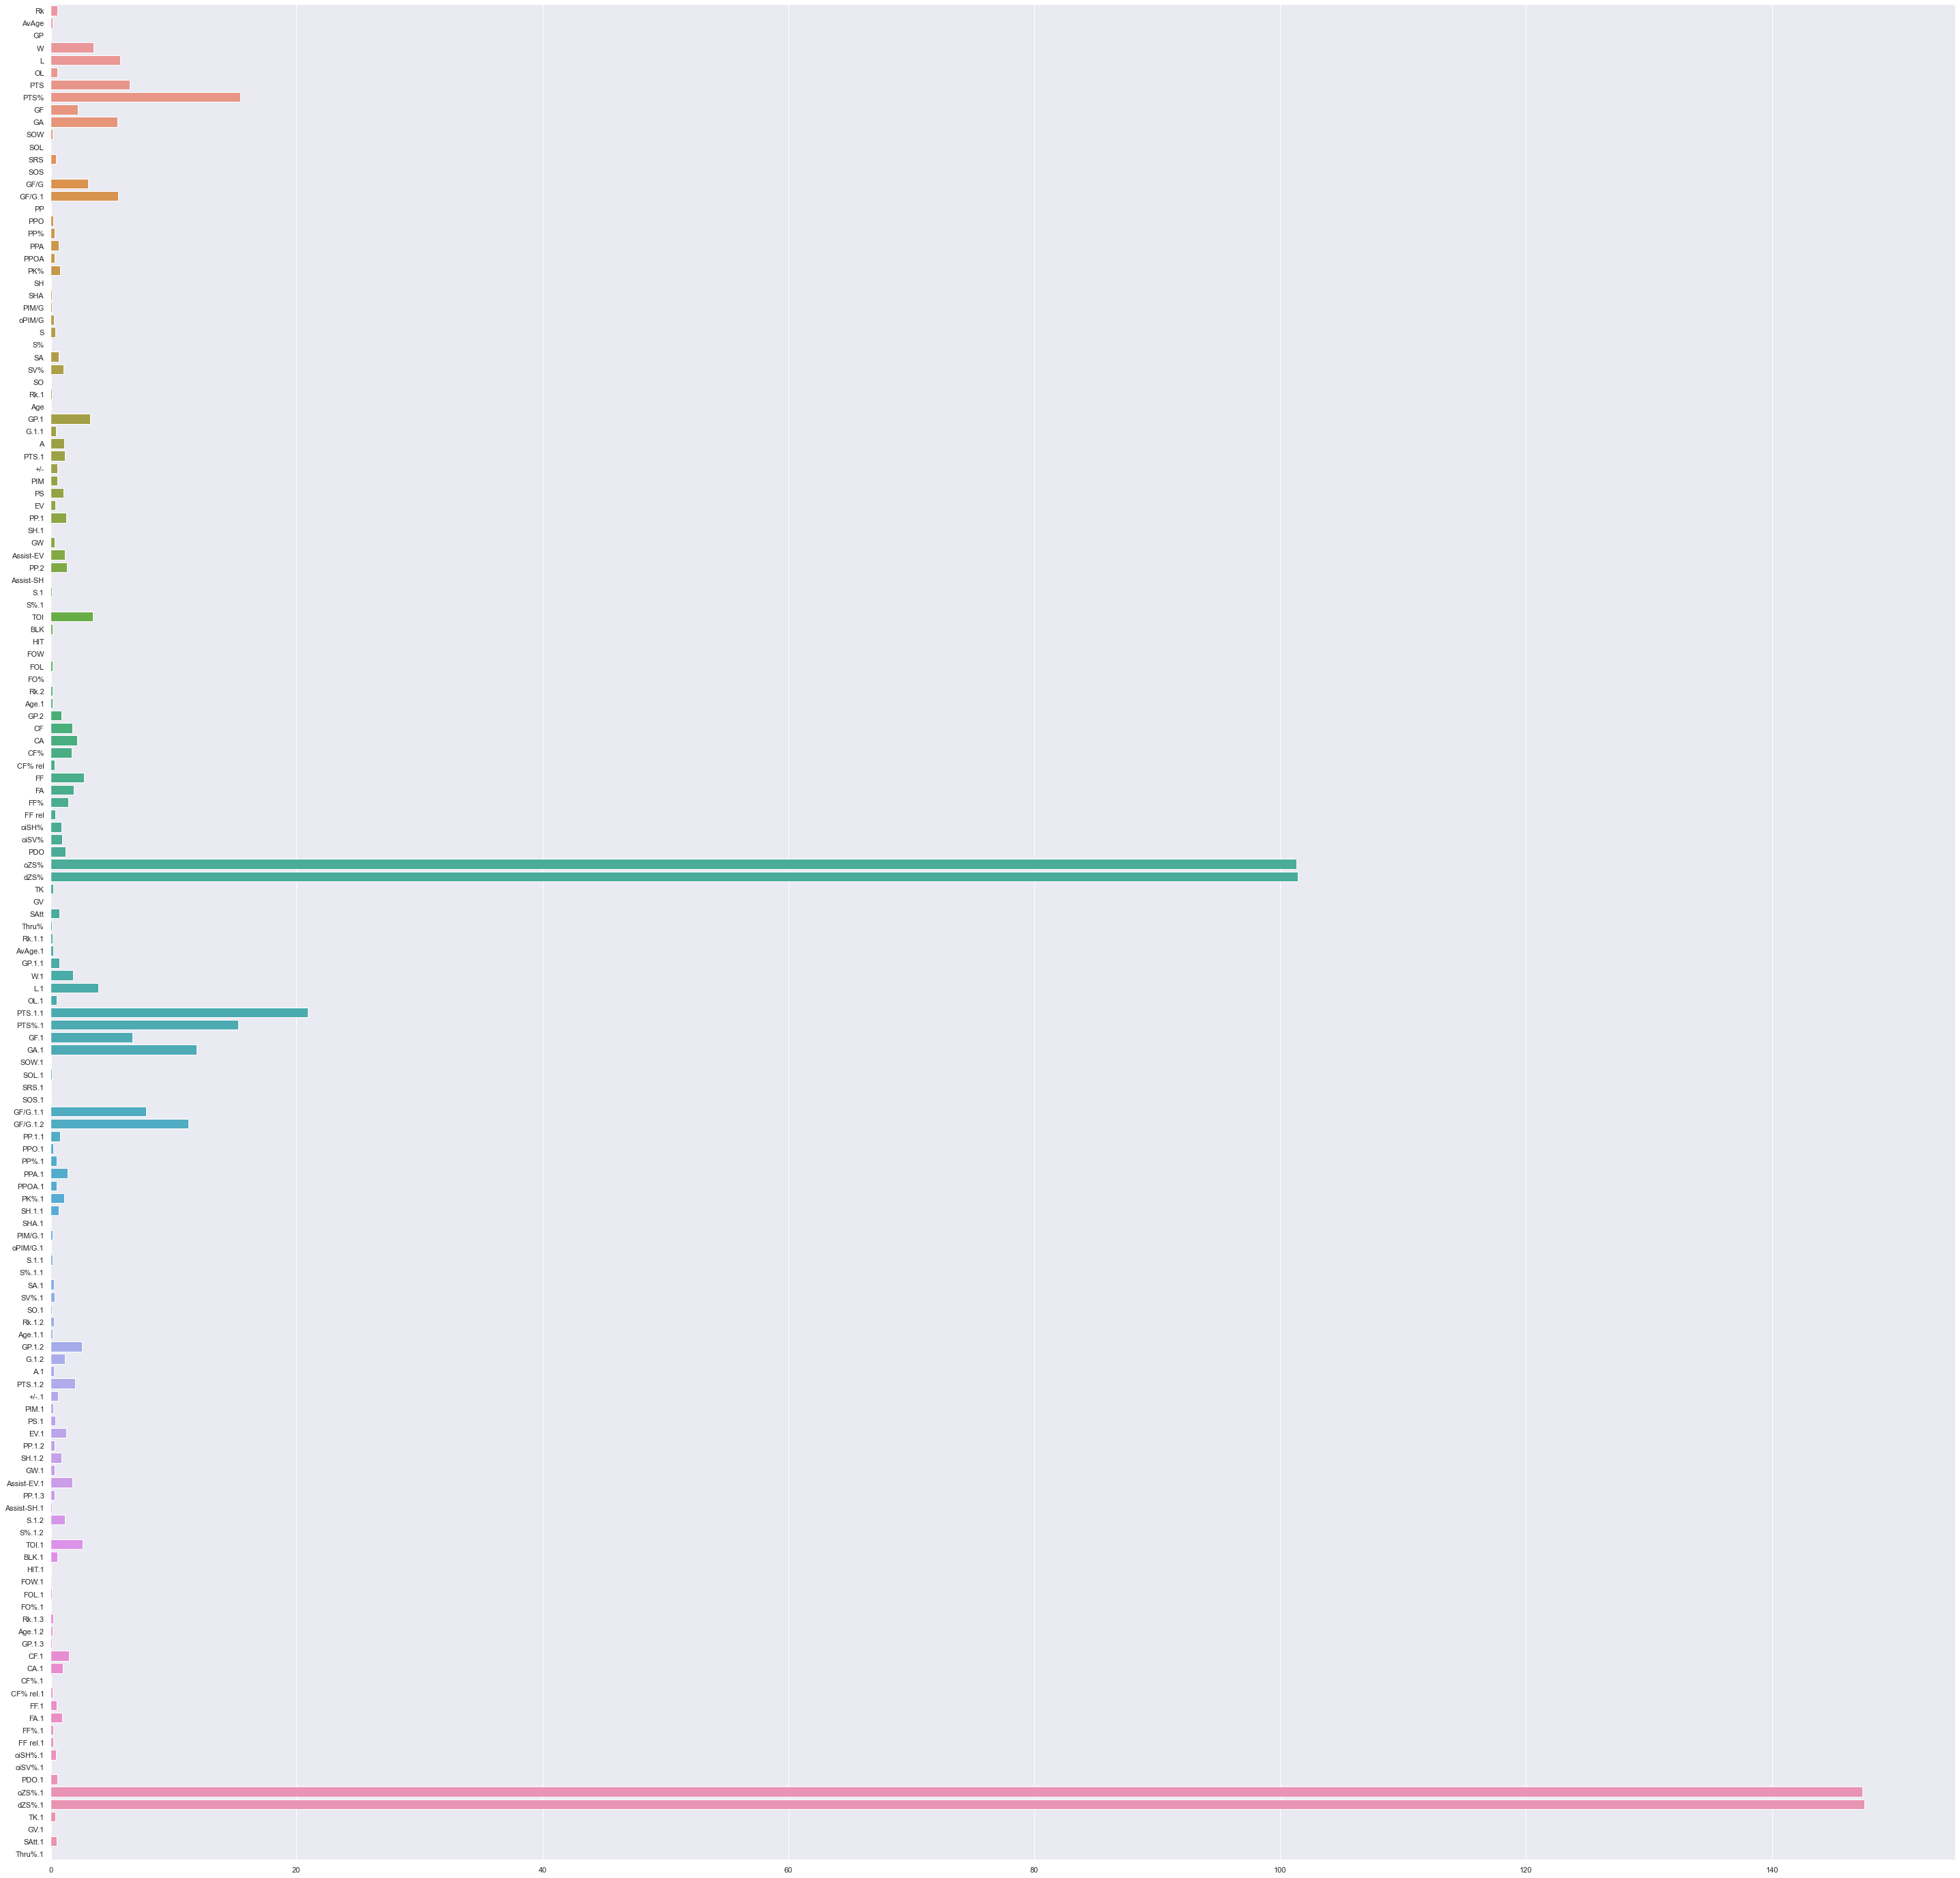

In [738]:
sns.set(rc = {'figure.figsize':(50,50)})
y_label = list(x_train.columns)
ax = sns.barplot(x= abs(importance_reg), y=y_label)

# LASSO REGRESSION

In [713]:
lasso_reg = Lasso(alpha = 0.1)
alphas = np.arange(0.1,10,0.1)
tuned_parameters = [{'alpha': alphas}]
search = GridSearchCV(lasso_reg,{'alpha':alphas},cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(x_train,y_train)
search.best_params_
##alpha = 0.1
importance_lasso_reg = lasso_reg.coef_
print(importance_lasso_reg)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ........................alpha=0.1;, score=-5.270 total time=   1.7s
[CV 2/5] END ........................alpha=0.1;, score=-4.655 total time=   0.0s
[CV 3/5] END ........................alpha=0.1;, score=-5.159 total time=   0.0s
[CV 4/5] END ........................alpha=0.1;, score=-5.224 total time=   0.0s
[CV 5/5] END ........................alpha=0.1;, score=-4.813 total time=   0.0s
[CV 1/5] END ........................alpha=0.2;, score=-5.270 total time=   0.0s
[CV 2/5] END ........................alpha=0.2;, score=-4.655 total time=   0.0s
[CV 3/5] END ........................alpha=0.2;, score=-5.159 total time=   0.0s
[CV 4/5] END ........................alpha=0.2;, score=-5.224 total time=   0.0s
[CV 5/5] END ........................alpha=0.2;, score=-4.813 total time=   0.0s
[CV 1/5] END ........alpha=0.30000000000000004;, score=-5.270 total time=   0.0s
[CV 2/5] END ........alpha=0.30000000000000004;

AttributeError: 'Lasso' object has no attribute 'coef_'

In [693]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(x_train,y_train)
y_pred_lasso_reg = lasso_reg.predict(x_test)
rms_lasso_reg = sqrt(mean_squared_error(y_test, y_pred_lasso_reg))
r2_lasso_reg = r2_score(y_test,y_pred_lasso_reg)
print(rms_lasso_reg)
print(r2_lasso_reg)


2.4225222121502115
-0.07297753912340244


# RANDOM FOREST REGRESSOR

In [684]:
RFR = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)
rms_rfr = sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr  = r2_score(y_test,y_pred)
print(rms_rfr)
print(r2_rfr)

2.401874538661643
-0.05476505293315337
